Chapter 20
# Pandas快速可视化
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
# pip install pandas_datareader
import seaborn as sns

## 下载数据

In [2]:
df = pdr.data.DataReader(['DGS6MO','DGS1','DGS2','DGS5','DGS7','DGS10','DGS20','DGS30'], data_source='fred', start='01-01-2022', end='12-31-2022')
df.to_csv('IR_data.csv')
# 如果不能下载，请用pandas.read_csv() 读取数据
df = df.dropna()

In [11]:
# 修改列标签
df = df.rename(columns={'DGS6MO': '0.5 yr', 'DGS1': '1 yr', 'DGS2': '2 yr', 'DGS5': '5 yr', 'DGS7': '7 yr', 'DGS10': '10 yr', 'DGS20': '20 yr', 'DGS30': '30 yr'})

<Axes: xlabel='Time', ylabel='IR level'>

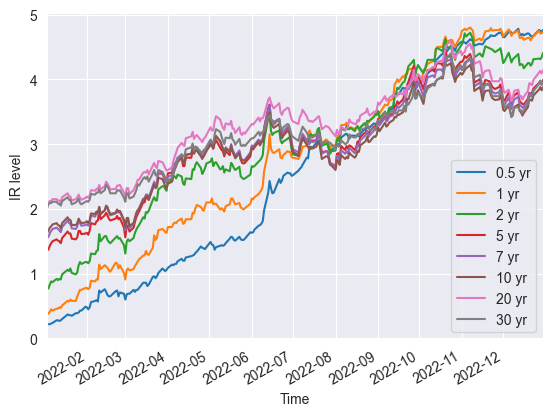

In [4]:
# 绘制利率走势线图
df.plot(xlabel="Time", ylabel="IR level", legend = True, xlim = (df.index.min(), df.index.max()))

Text(0, 0.5, 'IR level')

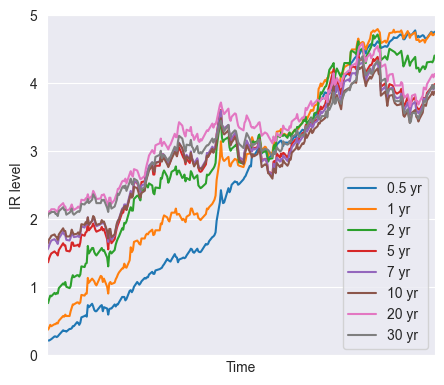

In [5]:
# 美化线图

fig, ax = plt.subplots(figsize = (5,5))
df.plot(ax = ax, xlabel="Time", legend = True)
ax.set_xlim((df.index.min(), df.index.max()))
ax.set_ylim((0,5))
ax.set_xticks([])
ax.set_xlabel('Time')
ax.set_ylabel('IR level')

array([[<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>]], dtype=object)

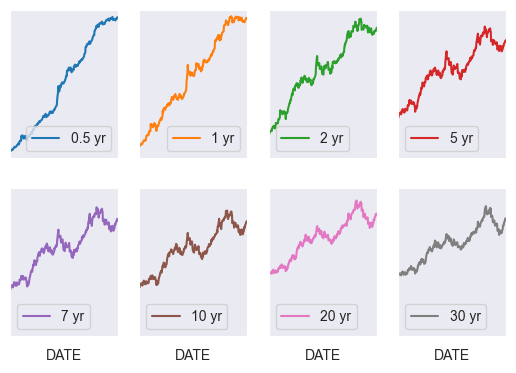

In [6]:
# 绘制利率走势线图，子图布置
df.plot(subplots=True, layout=(2,4), sharex = True, sharey = True,xticks = [],yticks =[],xlim = (df.index.min(), df.index.max()))

array([[<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>]], dtype=object)

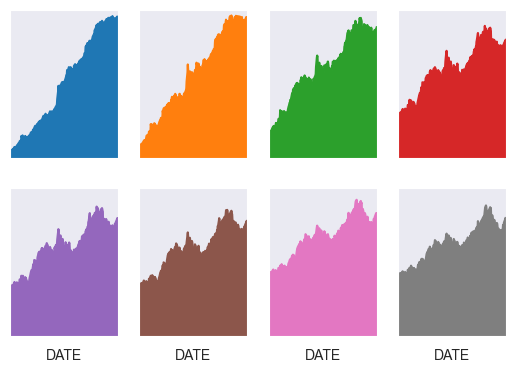

In [7]:
# 绘制利率走势线面积图，子图布置
df.plot.area(subplots=True, layout=(2,4), sharex = True, sharey = True,xticks = [],yticks =[],xlim = (df.index.min(), df.index.max()),ylim = (0,5),
             legend = False)

In [12]:
# 计算日收益率
r_df = df.pct_change()

array([[<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>]], dtype=object)

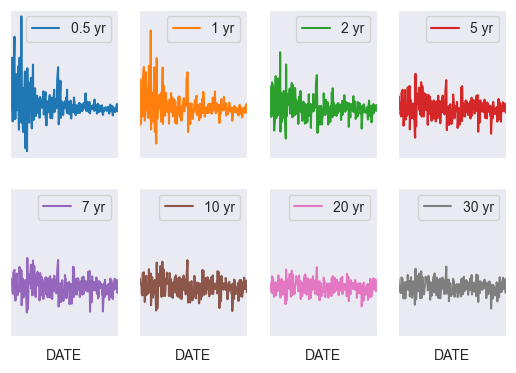

In [13]:
# 绘制利率日收益率，子图布置
r_df.plot(subplots=True, layout=(2,4), sharex = True, sharey = True,xticks = [],yticks =[],xlim = (df.index.min(), df.index.max()))

(-0.1, 0.25)

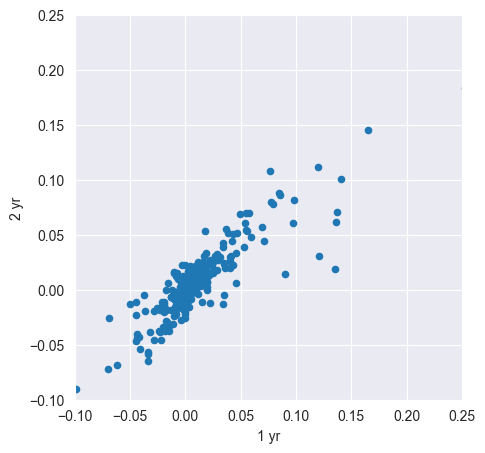

In [14]:
# 绘制散点图
fig, ax = plt.subplots(figsize = (5,5))
r_df.plot.scatter(x="1 yr", y="2 yr",ax = ax)

ax.set_xlim(-0.1, 0.25)
ax.set_ylim(-0.1, 0.25)

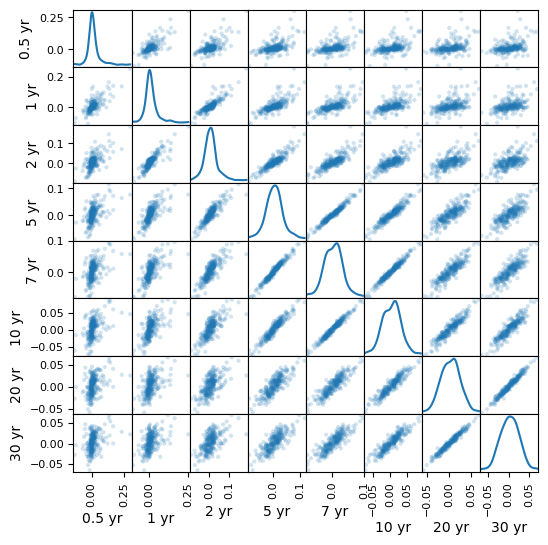

In [18]:
# 绘制成对特征散点图
from pandas.plotting import scatter_matrix
scatter_matrix(r_df, alpha=0.2, figsize=(6, 6), diagonal="kde")
plt.show()

(-0.1, 0.25)

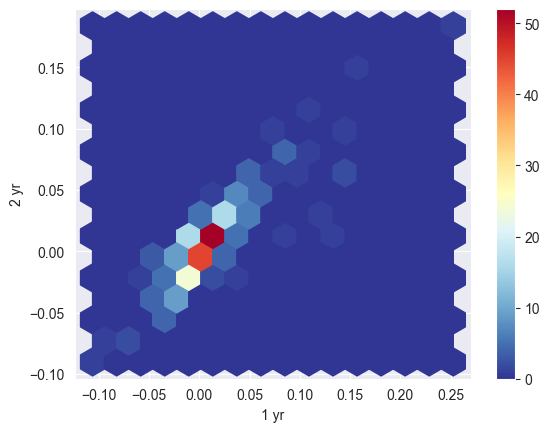

In [15]:

# 六边形图
r_df.plot.hexbin(x="1 yr", y="2 yr", gridsize = 15, cmap="RdYlBu_r")
ax.set_xlim(-0.1, 0.25)
ax.set_ylim(-0.1, 0.25)

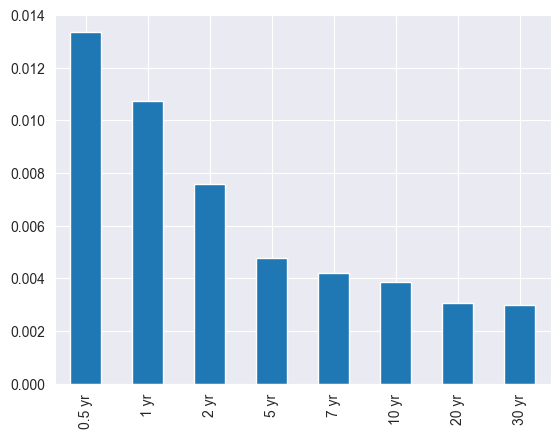

In [16]:
## 柱状图，竖直
r_df.mean().plot.bar()
plt.savefig("柱状图.svg")

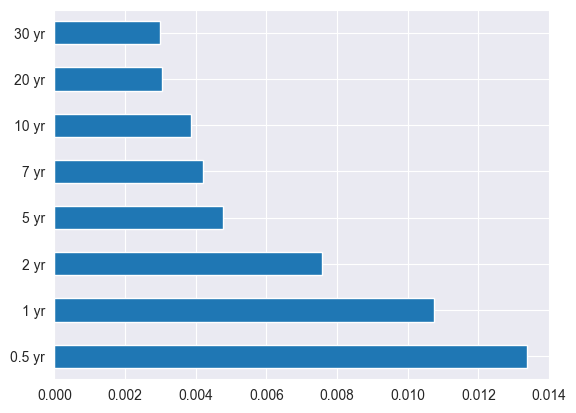

In [17]:
## 柱状图，水平
r_df.mean().plot.barh()
plt.savefig("水平柱状图.svg")

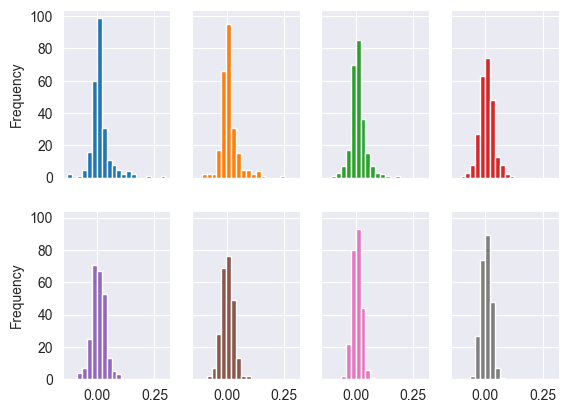

In [19]:
# 直方图，子图布置
r_df.plot.hist(subplots=True, layout=(2,4), sharex = True, sharey = True,bins = 20,legend = False)

plt.savefig("利率日收益率直方图，子图.svg")

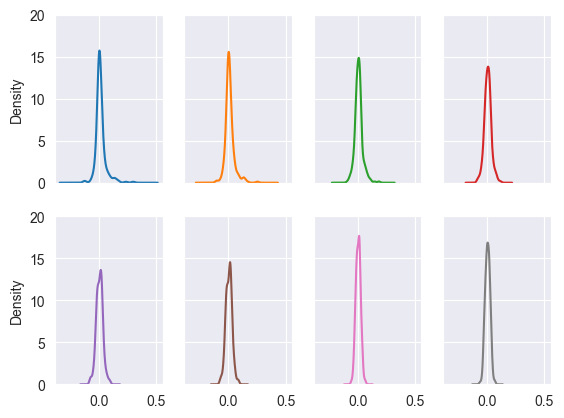

In [20]:
# KDE，子图布置
r_df.plot.kde(subplots=True, layout=(2,4), sharex = True, sharey = True,ylim = (0,20),legend = False)
plt.savefig("利率日收益率KDE，子图.svg")

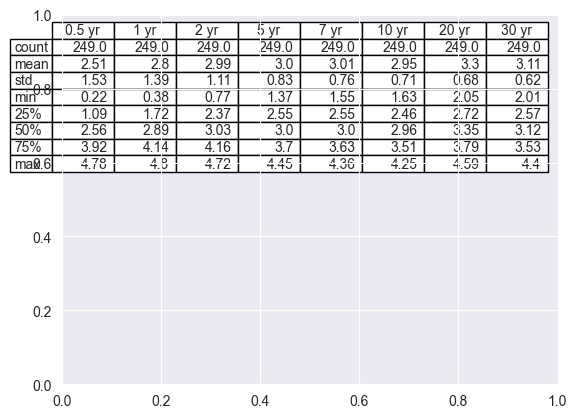

In [21]:
from pandas.plotting import table
fig, ax = plt.subplots(1, 1)
table(ax, np.round(df.describe(), 2), loc="upper right")

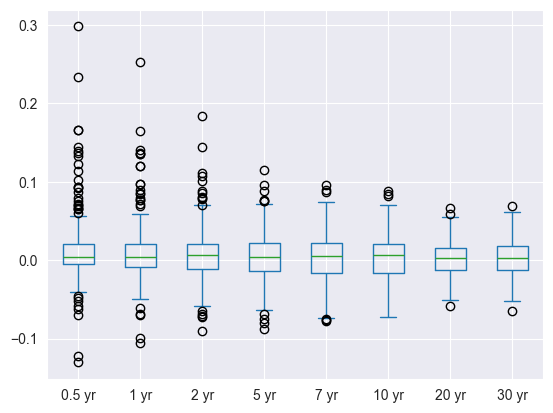

In [22]:
# 绘制箱型图
r_df.plot.box()
plt.savefig("利率日收益率箱型图.svg")

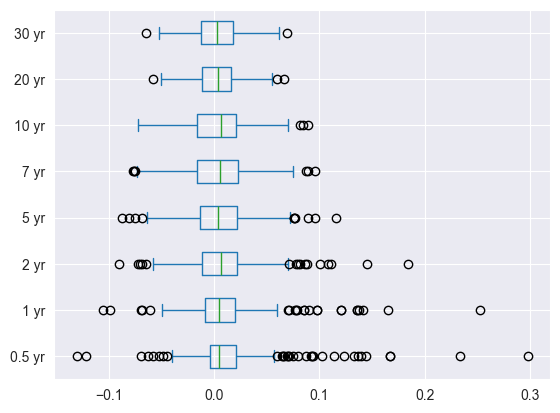

In [23]:
# 绘制箱型图，水平
r_df.plot.box(vert=False)
plt.savefig("利率日收益率箱型图，水平.svg")